### 1. Import the Dependencies

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

import pickle

### 2. Import the Dataset

In [2]:
df=pd.read_csv('star_classification.csv')

### 3. EDA

In [3]:
df.head(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
df.shape

(100000, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

##### 3.1. Label Encoding

In [7]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [8]:
print(le.classes_)

['GALAXY' 'QSO' 'STAR']


##### 3.2. Feature Selection

In [10]:
df = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID', 'spec_obj_ID'], axis = 1)
df.head(5)

,u,g,r,i,z,class,redshift,plate,MJD
0,23.9,22.3,20.4,19.2,18.8,0,0.6,5812,56354
1,24.8,22.8,22.6,21.2,21.6,0,0.8,10445,58158
2,25.3,22.7,20.6,19.3,18.9,0,0.6,4576,55592
3,22.1,23.8,21.6,20.5,19.3,0,0.9,9149,58039
4,19.4,17.6,16.5,16.0,15.5,0,0.1,6121,56187


In [11]:
new_order = ['u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'MJD', 'class']
df = df[new_order]

### 4. Balancing the 'Class'

C:\Users\noora\AppData\Local\Temp\ipykernel_27528\1640384205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['class'], palette='viridis')


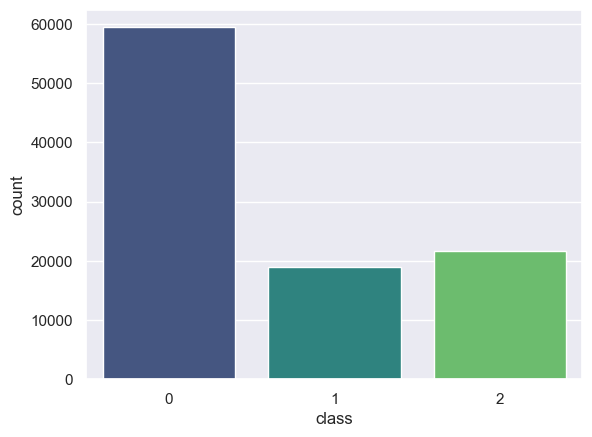

In [12]:
sns.set(style='darkgrid')
sns.countplot(x = df['class'], palette='viridis')
plt.show()

In [13]:
x = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values

In [14]:
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 59445, 2: 21594, 1: 18961})
Resampled dataset shape Counter({0: 59445, 1: 59445, 2: 59445})


In [15]:
df = pd.concat([pd.DataFrame(x, columns=x.columns), pd.Series(y, name='class')], axis=1)

C:\Users\noora\AppData\Local\Temp\ipykernel_27528\1640384205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['class'], palette='viridis')


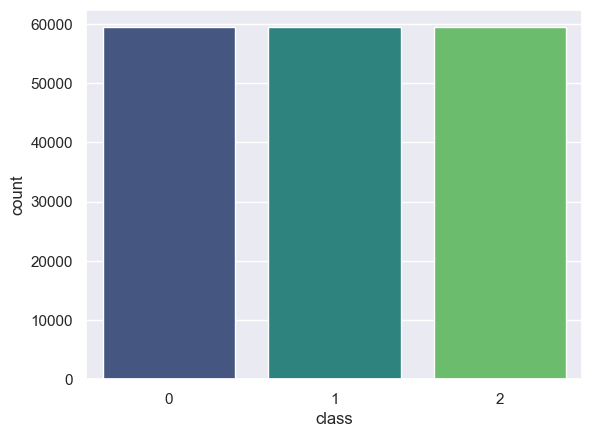

In [16]:
sns.set(style='darkgrid')
sns.countplot(x = df['class'], palette='viridis')
plt.show()

### 5. Split the Dataset

In [17]:
X = df.drop('class', axis=1)
y = df['class']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Model Building

##### 6.1. Create a Pipeline

In [19]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('pca', PCA(n_components=6)),  # Apply LDA
    ('knn', KNeighborsClassifier(n_neighbors=3, metric='manhattan'))  # Apply k-NN
])

##### 6.2. Fit the Model

In [20]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3))])

##### 6.3. Predict the Classes for Test set

In [22]:
y_pred = pipeline.predict(X_test)
y_pred

array([2, 0, 1, ..., 0, 1, 2])

##### 6.4. Accuracy of the Model

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 96.83%


##### 6.5. Classification of the Model

In [24]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11806
           1       0.97      0.96      0.97     11865
           2       0.97      0.99      0.98     11996

    accuracy                           0.97     35667
   macro avg       0.97      0.97      0.97     35667
weighted avg       0.97      0.97      0.97     35667



### 7. Predict on Unseen Data

In [25]:
predictive_input = [23.9, 22.3, 20.4, 19.2, 18.8, 0.6, 5812, 56354]
predictive_input_array = np.asarray(predictive_input).reshape(1, -1)
prediction = pipeline.predict(predictive_input_array)
print('Prediction: ',prediction)

if (prediction[0] == 0):
    print('Galaxy')
elif (prediction[0] == 1):
    print('Quasar')
else:
    print('Star')

Prediction:  [0]
Galaxy


c:\Users\noora\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
filename = 'classifier_model.sav'
pickle.dump(pipeline, open(filename, 'wb'))